## Tweets sentiment analysis using Naive bayes method as teached in Statquest youtube video.
#sentimentanalysis #logisticregression #python #binaryclassification #PCA #nlp #textclassification

### Code to run in colab or local PC
Kaggle Link : https://www.kaggle.com/code/ebadurrehmanrashid/naive-bayes-on-sentiment-analysis/

Github Link : https://github.com/Ebad-urRehman/nlp-projects/blob/master/Naive_bayes_using_Simple_method.ipynb

In [ ]:
import nltk
nltk.download('twitter_samples')
nltk.download('punkt')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus   import twitter_samples
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
print(len(positive_tweets))
print(len(negative_tweets))
print(len(text))

5000
5000
20000


In [ ]:
print('\n'.join(negative_tweets[:5]))

hopeless for tmr :(
Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(
@Hegelbon That heart sliding into the waste basket. :(
“@ketchBurning: I hate Japanese call him "bani" :( :(”

Me too
Dang starting next week I have "work" :(


In [ ]:
print('\n '.join(text[:5]))


RT @KirkKus: Indirect cost of the UK being in the EU is estimated to be costing Britain £170 billion per year! #BetterOffOut #UKIP
 VIDEO: Sturgeon on post-election deals http://t.co/BTJwrpbmOY
 RT @LabourEoin: The economy was growing 3 times faster on the day David Cameron became Prime Minister than it is today.. #BBCqt http://t.co…
 RT @GregLauder: the UKIP east lothian candidate looks about 16 and still has an msn addy http://t.co/7eIU0c5Fm1
 RT @thesundaypeople: UKIP's housing spokesman rakes in £800k in housing benefit from migrants.  http://t.co/GVwb9Rcb4w http://t.co/c1AZxcLh…


In [ ]:
# pre-processing
import numpy as np
tweet_tokens_pos = twitter_samples.tokenized('positive_tweets.json')
tweet_tokens_neg = twitter_samples.tokenized('negative_tweets.json')
all_tweets = tweet_tokens_pos + tweet_tokens_neg
labels = np.concatenate((np.ones(len(positive_tweets)), np.zeros(len(negative_tweets))))
print(tweet_tokens_pos[:3])
print(tweet_tokens_neg[:3])

[['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!']]
[['hopeless', 'for', 'tmr', ':('], ['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', '.', 'Shame', "I'm", 'nearly', '19', 'in', '2', 'months', ':('], ['@Hegelbon', 'That', 'heart', 'sliding', 'into', 'the', 'waste', 'basket', '.', ':(']]


In [ ]:
# getting stop words and punctuation
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_english = set(stopwords.words('english'))
print('Stop words\n')
print(stopwords_english)
print('\nPunctuation\n')
print(string.punctuation)

Stop words

{'all', 'being', 'don', 'my', 'of', 'down', "he's", 'how', "i'd", 'he', 'didn', 'them', 'isn', 'as', 'yourselves', "she's", 'when', "doesn't", 'further', "i'll", 'can', 'is', 'once', "wasn't", 'during', 'an', "didn't", "hadn't", "that'll", 'wouldn', 'just', 'haven', 'same', 'so', 'o', 'are', "we'd", 'such', 'himself', 'hers', 'both', 'for', "i've", 'had', "needn't", 'was', 'again', 'd', 'will', 'more', 'its', 'if', 'be', 'at', 'mustn', 'while', 'into', 'not', 'now', "weren't", 'myself', 'll', 'because', 'few', 'him', 'mightn', 're', 'that', "we've", 'ain', 'with', "you've", "we'll", "mustn't", 't', 'on', 'his', 'shouldn', "haven't", 've', 'y', "it'll", 'out', 'where', 'each', 'through', "won't", 'under', "mightn't", "you're", 'we', 'below', 'own', 'hadn', 'this', 's', "it's", 'the', 'what', 'after', 'been', 'did', 'from', 'in', 'these', 'by', "we're", 'ours', 'itself', "isn't", "they'll", "they'd", 'hasn', 'any', 'very', 'than', 'no', 'their', "you'll", "aren't", 'should', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# removing stopword and punctuation from tweets, and converting to lowercase
print('\033[92m')
print(all_tweets[:3])
print('\033[94m')
cleaned_tweets = []
for tweet in all_tweets:
    cleaned_tweet = []
    for word in tweet:
        if (word not in stopwords_english and word not in string.punctuation):
            cleaned_tweet.append(word.lower())
    cleaned_tweets.append(cleaned_tweet)
print('removed stop words and punctuation:')
print(cleaned_tweets[:3])


[['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!']]

removed stop words and punctuation:
[['#followfriday', '@france_inte', '@pkuchly57', '@milipol_paris', 'top', 'engaged', 'members', 'community', 'week', ':)'], ['@lamb2ja', 'hey', 'james', 'how', 'odd', ':/', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', ':)', 'many', 'thanks'], ['@despiteofficial', 'listen', 'last', 'night', ':)', 'as', 'you', 'bleed', 'amazing', 'track', 'when', 'scotland']]


In [ ]:
# handling emojis and emoticons
# happy emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
# sad emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';(', ':/'
    ])
print(emoticons_happy)
print(emoticons_sad)

{'XP', ':3', ":')", ':]', '>;)', '=)', ':^)', '=p', ':P', ':^*', ":'-)", ':D', ':c)', ':-P', '=]', ':)', '>:P', 'X-P', 'XD', ':-b', ':*', ':-)', '8D', '8)', 'X-D', '>:)', ':-p', ':}', ':p', ':-D', ':>', '>:-)', ';)', '8-D', 'xp', ':-))', ':o)', 'x-D', '=-D', '=D', 'xD', ':b', '<3', '=3', 'x-p', '=-3'}
{':S', ':[', ':/', '=L', '>.<', ':-/', '>:[', ':-c', ':-||', ":'(", ':(', '>:(', ':c', ':\\', ':-(', ':<', ';(', ':L', ':-<', ':-[', ':{', ":'-(", '=\\', '=/', '>:/', '>:\\', ':@'}


In [ ]:
print('\033[92m')
print(cleaned_tweets[:3])
print('\033[94m')
de_emoteicons_tweets = []
for tweet in cleaned_tweets:
    de_emoteicons_tweet = []
    for index, word in enumerate(tweet):
        if word in emoticons_happy:
            de_emoteicons_tweet.append('happy')
        elif word in emoticons_sad:
            de_emoteicons_tweet.append('sad')
        else:
            de_emoteicons_tweet.append(word)

    de_emoteicons_tweets.append(de_emoteicons_tweet)
print('removed emote icons and replace with sentiments')
print(de_emoteicons_tweets[:3])


[['#followfriday', '@france_inte', '@pkuchly57', '@milipol_paris', 'top', 'engaged', 'members', 'community', 'week', ':)'], ['@lamb2ja', 'hey', 'james', 'how', 'odd', ':/', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', ':)', 'many', 'thanks'], ['@despiteofficial', 'listen', 'last', 'night', ':)', 'as', 'you', 'bleed', 'amazing', 'track', 'when', 'scotland']]

removed emote icons and replace with sentiments
[['#followfriday', '@france_inte', '@pkuchly57', '@milipol_paris', 'top', 'engaged', 'members', 'community', 'week', 'happy'], ['@lamb2ja', 'hey', 'james', 'how', 'odd', 'sad', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', 'happy', 'many', 'thanks'], ['@despiteofficial', 'listen', 'last', 'night', 'happy', 'as', 'you', 'bleed', 'amazing', 'track', 'when', 'scotland']]


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 15.9 MB/s eta 0:00:00


In [ ]:
# remove emojies using emoji library
import emoji
print('\033[92m')
print(de_emoteicons_tweets[:3])
print('\033[94m')
def remove_emoji(text):
    return emoji.demojize(text).replace(":", "").replace("_", " ")

no_emoji_tweets = []

for tweet in de_emoteicons_tweets:
    no_emoji_tweet = []
    for word in tweet:
        no_emoji_tweet.append(remove_emoji(word))
    no_emoji_tweets.append(no_emoji_tweet)

print('removed emoji')
print(no_emoji_tweets[:3])



[['#followfriday', '@france_inte', '@pkuchly57', '@milipol_paris', 'top', 'engaged', 'members', 'community', 'week', 'happy'], ['@lamb2ja', 'hey', 'james', 'how', 'odd', 'sad', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', 'happy', 'many', 'thanks'], ['@despiteofficial', 'listen', 'last', 'night', 'happy', 'as', 'you', 'bleed', 'amazing', 'track', 'when', 'scotland']]

removed emoji
[['#followfriday', '@france inte', '@pkuchly57', '@milipol paris', 'top', 'engaged', 'members', 'community', 'week', 'happy'], ['@lamb2ja', 'hey', 'james', 'how', 'odd', 'sad', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', 'happy', 'many', 'thanks'], ['@despiteofficial', 'listen', 'last', 'night', 'happy', 'as', 'you', 'bleed', 'amazing', 'track', 'when', 'scotland']]


In [ ]:
# removing twitter handles and emails links etc
print('\033[92m')
print(de_emoteicons_tweets[0])
print('\033[94m')
import re

# for removing handles
handles_pattern = r'@[\w]+'

# for removing links
url_pattern1 = r'https?://[A-Za-z0-9./]+'
url_pattern2 = r'www.[^ ]+'

# for removing emails
email_pattern = r'\S+@\S+'

# for removing hashtags
hashtag_pattern = r'#[\w]+'

# for removing numbers
number_pattern = r'\d+'

de_handle_tweets = []
for tweet in de_emoteicons_tweets:
    de_handle_tweet = []
    for word in tweet:
        word = re.sub(handles_pattern, '', word)
        word = re.sub(url_pattern1, '', word)
        word = re.sub(url_pattern2, '', word)
        word = re.sub(email_pattern, '', word)
        word = re.sub(hashtag_pattern, '', word)
        word = re.sub(number_pattern, '', word)
        de_handle_tweet.append(word) if word != '' else None
    de_handle_tweets.append(de_handle_tweet)
print('removed twitter handles')
print(de_handle_tweets[:3])


['#followfriday', '@france_inte', '@pkuchly57', '@milipol_paris', 'top', 'engaged', 'members', 'community', 'week', 'happy']

removed twitter handles
[['top', 'engaged', 'members', 'community', 'week', 'happy'], ['hey', 'james', 'how', 'odd', 'sad', 'please', 'call', 'contact', 'centre', 'able', 'assist', 'happy', 'many', 'thanks'], ['listen', 'last', 'night', 'happy', 'as', 'you', 'bleed', 'amazing', 'track', 'when', 'scotland']]


In [ ]:
# checking all tweets once
print('\033[92m')
print(de_handle_tweets)
print('\033[94m')


[['top', 'engaged', 'members', 'community', 'week', 'happy'], ['hey', 'james', 'how', 'odd', 'sad', 'please', 'call', 'contact', 'centre', 'able', 'assist', 'happy', 'many', 'thanks'], ['listen', 'last', 'night', 'happy', 'as', 'you', 'bleed', 'amazing', 'track', 'when', 'scotland'], ['congrats', 'happy'], ['yeaaaah', 'yippppy', 'accnt', 'verified', 'rqst', 'succeed', 'got', 'blue', 'tick', 'mark', 'fb', 'profile', 'happy', 'days'], ['this', 'one', 'irresistible', 'happy'], ['we', 'like', 'keep', 'lovely', 'customers', 'waiting', 'long', 'we', 'hope', 'enjoy', 'happy', 'friday', 'lwwf', 'happy'], ['on', 'second', 'thought', '’', 'enough', 'time', 'dd', 'happy', 'but', 'new', 'shorts', 'entering', 'system', 'sheep', 'must', 'buying'], ['jgh', 'go', 'bayan', ':d', 'bye'], ['as', 'act', 'mischievousness', 'calling', 'etl', 'layer', 'in-house', 'warehousing', 'app', 'katamari', 'well', '…', 'name', 'implies', 'happy'], ['top', 'influencers', 'community', 'week', 'happy'], ['who', "wouldn'

In [ ]:
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test = train_test_split(de_handle_tweets, labels, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming X_train and X_test are lists of tokenized words
vectorizer = CountVectorizer()

# Transform the tokenized lists directly (no need for looping and rejoining)
X_train_vectorized = vectorizer.fit_transform([' '.join(tweet) for tweet in X_train])
X_test_vectorized = vectorizer.transform([' '.join(tweet) for tweet in X_test])

# Print shapes of the resulting sparse matrices
print(X_train_vectorized.shape)  # Number of documents x Number of unique words
print(X_test_vectorized.shape)


X_train_array = X_train_vectorized.toarray()
X_test_array = X_test_vectorized.toarray()

# To inspect a specific document's word counts, you can access it like this:
# Get the first document's vector (sparse matrix format)
print(X_train_vectorized[0])  # Sparse matrix format
# If you want to see the word counts (dense format):
print(X_train_vectorized[0].toarray())

# Print the feature names (words corresponding to columns)
print(vectorizer.get_feature_names_out())


(8000, 9341)
(2000, 9341)
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (1, 9341)>
  Coords	Values
  (0, 6977)	1
  (0, 5019)	1
[[0 0 0 ... 0 0 0]]
['__' '___' '__final_final_final' ... 'للعودة' 'ｍｅ' 'ｓｅｅ']
(8000, 9341)
(2000, 9341)
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (1, 9341)>
  Coords	Values
  (0, 6977)	1
  (0, 5019)	1
[[0 0 0 ... 0 0 0]]
['__' '___' '__final_final_final' ... 'للعودة' 'ｍｅ' 'ｓｅｅ']


In [ ]:
vocabulary = vectorizer.get_feature_names_out()
print(vocabulary[:10])
print(vocabulary[-10:])
print(np.shape(vocabulary))

['__' '___' '__final_final_final' '_gpctsojkw' '_siwonie' 'aa' 'aaaaaand'
 'aaaaahhhhhhhh' 'aaaahh' 'aaaahhh']
['zzzz' 'zzzzzz' 'фотосет' 'العنزي' 'بندر' 'تكفى' 'للحياة' 'للعودة' 'ｍｅ'
 'ｓｅｅ']
(9341,)


In [ ]:
# words frequency counts in positive class
positive_words_count = np.sum(X_train_array[y_train ==1], axis=0) # column wise sum of positive classes
print(positive_words_count[:50])

[1 0 1 0 1 2 1 0 0 1 1 0 0 0 2 1 1 0 1 0 0 1 0 1 1 0 1 5 0 3 4 0 2 2 0 0 0
 0 2 6 1 1 0 1 0 1 0 1 0 1]


In [ ]:
negative_words_count = np.sum(X_train_array[y_train==0], axis=0)
print(negative_words_count[:50])

[ 2  2  0  1  0  0  0  1  1  0  1  1  1  1  0  0  0  1  0  2  1  3  1  0
  0  1  0 19  2  0  0  1  0  1  1  3  1  1  2  3  3  0  1  0  1  0  1  6
  1  1]


## Finding Probabilities of words given class


## With Laplacian Smoothing
$$P(\text{word}_i | \text{class}) = \frac{\text{word count in class} + 1}{\text{total words in class} + V}$$

In [ ]:
p_word_given_pos_class = (positive_words_count + 1) / (np.sum(positive_words_count) + len(vocabulary))
p_word_given_neg_class = (negative_words_count + 1) / (np.sum(negative_words_count) + len(vocabulary))
print(p_word_given_pos_class[:10])
print(p_word_given_neg_class[:10])

[5.71869728e-05 2.85934864e-05 5.71869728e-05 2.85934864e-05
 5.71869728e-05 8.57804592e-05 5.71869728e-05 2.85934864e-05
 2.85934864e-05 5.71869728e-05]
[8.51329493e-05 8.51329493e-05 2.83776498e-05 5.67552995e-05
 2.83776498e-05 2.83776498e-05 2.83776498e-05 5.67552995e-05
 5.67552995e-05 2.83776498e-05]


## We have likehood probabilites
## so now we can find prior classes
## In Statquest yt style
## So we have to calculate probabilites using that equation


$$P(class∣document)∝P(class)⋅i∏​P(wordi​∣class)$$

## Now we have Probability of all the words given thier classes above
## We have to now find probability of positive and negative class(they are called prior in this method) i.e. chances of any word(without any condition) to be in any of the class

In [ ]:
prior_pos = np.sum(y_train == 1) / len(y_train)
prior_neg = np.sum(y_train == 0) / len(y_train)
print(prior_pos)
print(prior_neg)

0.4985
0.5015


In [ ]:
# Applying log to all probabilites to prevent underflow
# As values are very very less there are very much chances of underflow, so we take log to make them some bigger

log_prior_pos = np.log(prior_pos)
log_prior_neg = np.log(prior_neg)

log_p_word_given_pos_class = np.log(p_word_given_pos_class)
log_p_word_given_neg_class = np.log(p_word_given_neg_class)



In [ ]:
# according to the formula the dot product of all words probabilites and class probability give us probability of doc belonging to that class
log_doc_probs_pos = X_test_array @ log_p_word_given_pos_class + log_prior_pos
log_doc_probs_neg = X_test_array @ log_p_word_given_neg_class + log_prior_neg

In [ ]:
y_pred = (log_doc_probs_pos > log_doc_probs_neg).astype(int)log_probs_pos = X_test_array @ log_pos_probs + log_p_pos
log_probs_neg = X_test_array @ log_neg_probs + log_p_neg

In [ ]:
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Test Accuracy: 0.9645
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       988
         1.0       0.99      0.94      0.96      1012

    accuracy                           0.96      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.97      0.96      0.96      2000

Test Confusion Matrix:
 [[980   8]
 [ 63 949]]


<Axes: >

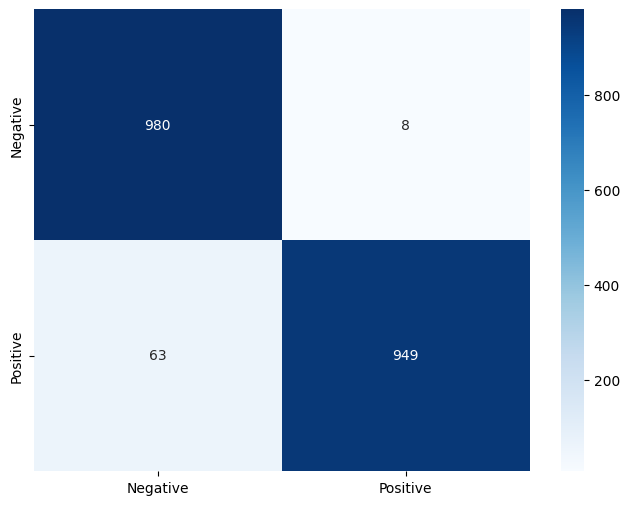

In [ ]:
# plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])